In [1]:
# =======================
#     Core Libraries
# =======================
import os
import pickle
import numpy as np
import pandas as pd

# =======================
#   Data Visualization
# =======================
import matplotlib.pyplot as plt
import seaborn as sns

# =======================
#      Preprocessing
# =======================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SequentialFeatureSelector


# =======================
#       ML Models
# =======================
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# =======================
#   Evaluation Metrics
# =======================
from sklearn.metrics import accuracy_score, f1_score

In [2]:
# Load Dataset
df = pd.read_csv("./datasets/heart_disease.csv")

In [3]:
# Display First 5 Rows
print("Head of the dataset:\n")
df.head()

Head of the dataset:



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# Shape of the Dataset
print("Shape of the dataset:\n")
df.shape

Shape of the dataset:



(1025, 14)

In [5]:
# Info about Dataset
print("Info about the dataset:\n")
df.info()

Info about the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
# Check for Duplicates and Remove if Any
duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {duplicates}\n")

if duplicates > 0:
    df = df.drop_duplicates()
    print("✅ Duplicates removed.")

Total duplicate rows: 723

✅ Duplicates removed.


In [7]:
# Check and Handle Missing Values
print(f"Shape of dataset before removing missing values:{df.shape} \n")

missing = df.isnull().mean() * 100
print("Missing Value Percentage:\n", missing)

for col in df.columns[df.isnull().any()]:
    if missing[col] < 5:
        df.dropna(subset=[col], inplace=True)
        print(f"✅ Dropped rows with missing values in '{col}' (<5%).")
    else:
        fill_value = df[col].mode()[0] if df[col].dtype == 'object' else df[col].median()
        df[col].fillna(fill_value, inplace=True)
        print(f"🔧 Filled missing values in '{col}' with {'mode' if df[col].dtype == 'object' else 'median'}.")

print(f"Shape of dataset after removing missing values:{df.shape} \n")

Shape of dataset before removing missing values:(302, 14) 

Missing Value Percentage:
 age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64
Shape of dataset after removing missing values:(302, 14) 



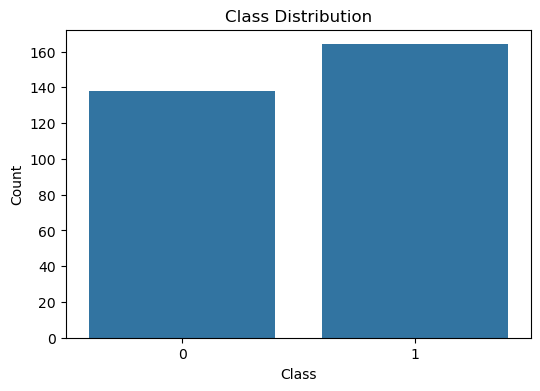

Class Distribution:
target
1    164
0    138
Name: count, dtype: int64
✅ Class distribution is balanced. No need to apply imbalance techniques.


In [8]:
# Class Distribution (Assuming last column is target)
target_col = df.columns[-1]

# Plotting the Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=target_col, data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Checking for Imbalance
class_counts = df[target_col].value_counts()
print(f"Class Distribution:\n{class_counts}")

# If class distribution is imbalanced, suggest techniques
if class_counts.min() / class_counts.max() < 0.1:  # If the ratio between smallest and largest class is <10%
    print("⚠️ Class distribution is imbalanced. Consider applying imbalance handling techniques (like SMOTE, undersampling, or oversampling).")
else:
    print("✅ Class distribution is balanced. No need to apply imbalance techniques.")


In [9]:
# Define the new column names
new_column_names = {
    'age': 'Age',
    'sex': 'Sex',
    'cp': 'ChestPainType',
    'trestbps': 'RestingBP',
    'chol': 'Cholesterol',
    'fbs': 'FastingBloodSugar',
    'restecg': 'RestingECG',
    'thalach': 'MaxHeartRate',
    'exang': 'ExerciseAngina',
    'oldpeak': 'STDepression',
    'slope': 'STSlope',
    'ca': 'MajorVessels',
    'thal': 'Thalassemia',
    'target': 'HeartDisease'
}

# Rename the columns
df = df.rename(columns=new_column_names)

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExerciseAngina,STDepression,STSlope,MajorVessels,Thalassemia,HeartDisease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [10]:
# Define numerical columns to standardize
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'Thalassemia', 'STDepression']

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize only the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Verify the standardization (optional: print mean and std of standardized columns)
print("Mean of standardized columns:")
print(df[numerical_columns].mean())
print("\nStandard deviation of standardized columns:")
print(df[numerical_columns].std())

Mean of standardized columns:
Age            -2.676299e-16
RestingBP      -6.676043e-16
Cholesterol    -1.470494e-17
Thalassemia     4.999680e-17
STDepression   -1.294035e-16
dtype: float64

Standard deviation of standardized columns:
Age             1.00166
RestingBP       1.00166
Cholesterol     1.00166
Thalassemia     1.00166
STDepression    1.00166
dtype: float64


In [11]:
# separate features and class
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Get the feature names from X for future use in Feature selection techniques
feature_names = X.columns.tolist()

# Define models
models = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB()
}

In [12]:
print("Evaluating models with all features: \n")

# Separate dictionaries for each metric
all_features_model_accuracies = {}
all_features_model_f1_scores = {}

# Loop through each model
for model_name, model_instance in models.items():
    model_instance.fit(X_train, y_train)
    y_pred = model_instance.predict(X_test)

    # Save metrics
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    f1 = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)

    # Add metrics to the respective dictionaries
    all_features_model_accuracies[model_name] = accuracy
    all_features_model_f1_scores[model_name] = f1

# Print results
print("Baseline model accuracies (with all features):")
print(all_features_model_accuracies)

print("\nBaseline model F1 scores (with all features):")
print(all_features_model_f1_scores)

Evaluating models with all features: 

Baseline model accuracies (with all features):
{'KNN': 73.77, 'Logistic Regression': 77.05, 'Decision Tree': 75.41, 'SVM': 60.66, 'Naive Bayes': 85.25}

Baseline model F1 scores (with all features):
{'KNN': 73.27, 'Logistic Regression': 76.94, 'Decision Tree': 75.29, 'SVM': 57.62, 'Naive Bayes': 85.25}


C:\Users\mohdm\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
# Create the directory if it doesn't exist
os.makedirs('./models', exist_ok=True)

# Assuming the 'models' dictionary already exists and the model is trained
heart_disease_model = models['Naive Bayes']

# Save the model to the specified path
with open('./models/heart_disease_model.pkl', 'wb') as file:
    pickle.dump(heart_disease_model, file)

print("✅ Naive Bayes model saved to './models/heart_disease_model.pkl'")

✅ Naive Bayes model saved to './models/heart_disease_model.pkl'


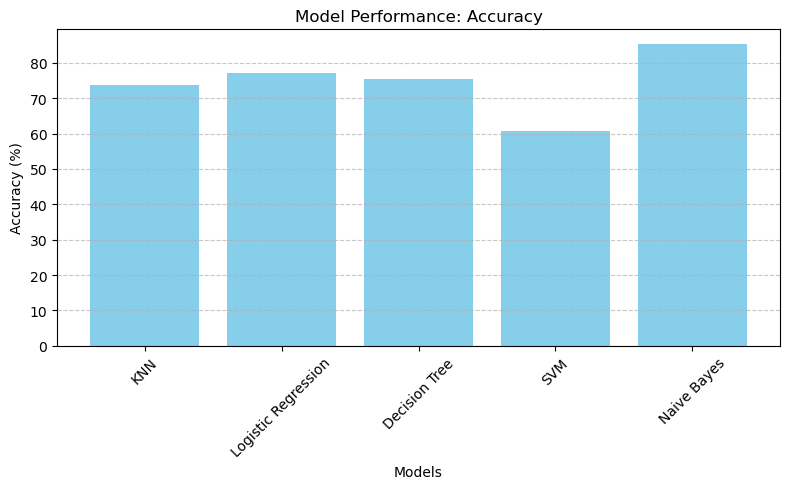

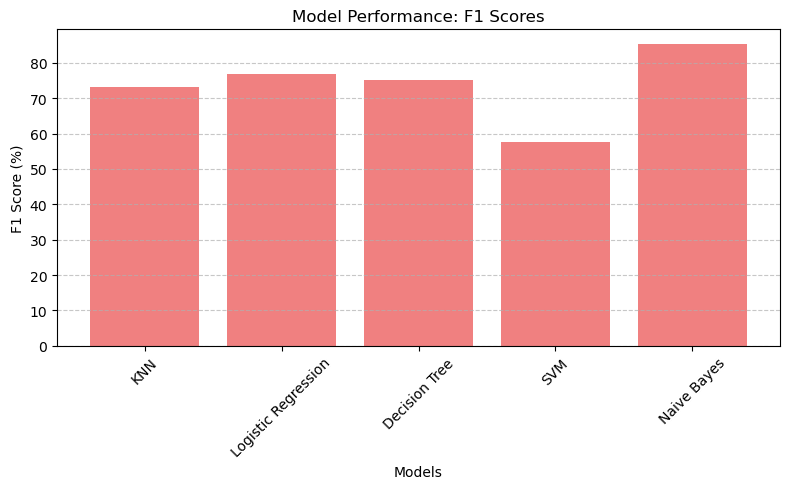

In [14]:
# Dynamically extract models and values
model = list(all_features_model_accuracies.keys())
accuracies = list(all_features_model_accuracies.values())
f1_scores = list(all_features_model_f1_scores.values())

# Validate that the dictionaries have the same keys
if set(all_features_model_accuracies.keys()) != set(all_features_model_f1_scores.keys()):
    raise ValueError("Dictionaries must have the same models as keys")

# --- Plot 1: Bar Chart for Accuracies ---
plt.figure(figsize=(8, 5))
x = np.arange(len(models))
plt.bar(x, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Performance: Accuracy')
plt.xticks(x, models, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Plot 2: Bar Chart for F1 Scores ---
plt.figure(figsize=(8, 5))
x = np.arange(len(models))
plt.bar(x, f1_scores, color='lightcoral')
plt.xlabel('Models')
plt.ylabel('F1 Score (%)')
plt.title('Model Performance: F1 Scores')
plt.xticks(x, models, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()